This notebook tests the correctness of APD using a real sensor (accelerometer) data.

In [26]:
from DQM import DQM_single_file
import pandas as pd
from load_data import load_data_json_single_file
from pipeline_functions.preprocessing import *
import matplotlib.pyplot as plt

Import the read data, then compute the DQM for it.

In [27]:
df = load_data_json_single_file('/home/lin/Documents/CAMH/QA-module/data/sensor/json/SUBJ00001_Accelerometer_REC000004.json')
print(df)

                timestamp         x         y         z
0     1593961343290000000 -1.484405  8.662222 -4.252102
1     1593961343495000000 -1.345541  8.561666 -4.793192
2     1593961343708000000 -2.006341  8.595184 -4.841076
3     1593961343912000000 -1.855506  8.528147 -4.848259
4     1593961344114000000 -0.919373  8.396465 -4.754885
...                   ...       ...       ...       ...
5237  1593962661392000000  0.883460  5.846641  7.740454
5238  1593962661598000000  0.905008  5.786786  7.757214
5239  1593962661804000000  0.859518  5.870583  7.539341
5240  1593962662009000000  0.864307  5.930438  7.671022
5241  1593962662217000000  0.890643  5.872977  7.893683

[5242 rows x 4 columns]


In [28]:
testing_APD_DQM = DQM_single_file()
testing_APD_DQM.set_input_data(df)
testing_APD_DQM.compute_DQM()

Start computing the DQM... This may take a long time if the dataset is large
The total time for computing the DQM is: 2.9032649993896484 seconds.


First we get the APD score of the record

In [29]:
testing_APD_DQM.get_APD()

'0.017741320106829453'

Now we get the index of the anomaly points.

In [30]:
testing_APD_DQM.get_anomaly_index()

[1091,
 1360,
 2650,
 2652,
 2653,
 2654,
 2655,
 2656,
 2747,
 2749,
 2751,
 2779,
 2780,
 2781,
 2782,
 2783,
 2786,
 2787,
 2788,
 2789,
 2790,
 2791,
 3280,
 3284,
 3362,
 3477,
 3559,
 3658,
 3659,
 3737,
 3738,
 3739,
 3876,
 3898,
 3970,
 3973,
 3975,
 3976,
 3977,
 3979,
 3980,
 3982,
 4111,
 4112,
 4113,
 4114,
 4170,
 4191,
 4192,
 4197,
 4198,
 4303,
 4348,
 4410,
 4412,
 4414,
 4415,
 4416,
 4461,
 4476,
 4477,
 4531,
 4565,
 4566,
 4610,
 4645,
 4646,
 4647,
 4648,
 4649,
 4650,
 4651,
 4652,
 4653,
 4654,
 4655,
 4670,
 4745,
 4748,
 4750,
 4825,
 4827,
 5003,
 5005,
 5006,
 5157,
 5163,
 5194,
 5195,
 5196,
 5197,
 5198,
 5200]

The computed APD score should be the lenth of categorized anomaly points divided by the length of the record.

In [31]:
len(testing_APD_DQM.get_anomaly_index())/(df.shape[0])

0.017741320106829453

Now we justified the correctness of APD score computation, then we show that the computed data points are actually anomaly points.

First we preprocess the raw data for the visulization.

In [32]:
feature_names = list(df.keys())
feature_names.remove(feature_names[0])
record = features_to_float(df, feature_names)
print(record)

                timestamp         x         y         z
0     1593961343290000000 -1.484405  8.662222 -4.252102
1     1593961343495000000 -1.345541  8.561666 -4.793192
2     1593961343708000000 -2.006341  8.595184 -4.841076
3     1593961343912000000 -1.855506  8.528147 -4.848259
4     1593961344114000000 -0.919373  8.396465 -4.754885
...                   ...       ...       ...       ...
5237  1593962661392000000  0.883460  5.846641  7.740454
5238  1593962661598000000  0.905008  5.786786  7.757214
5239  1593962661804000000  0.859518  5.870583  7.539341
5240  1593962662009000000  0.864307  5.930438  7.671022
5241  1593962662217000000  0.890643  5.872977  7.893683

[5242 rows x 4 columns]


Now we visulize the record with the anomaly points highlighted.

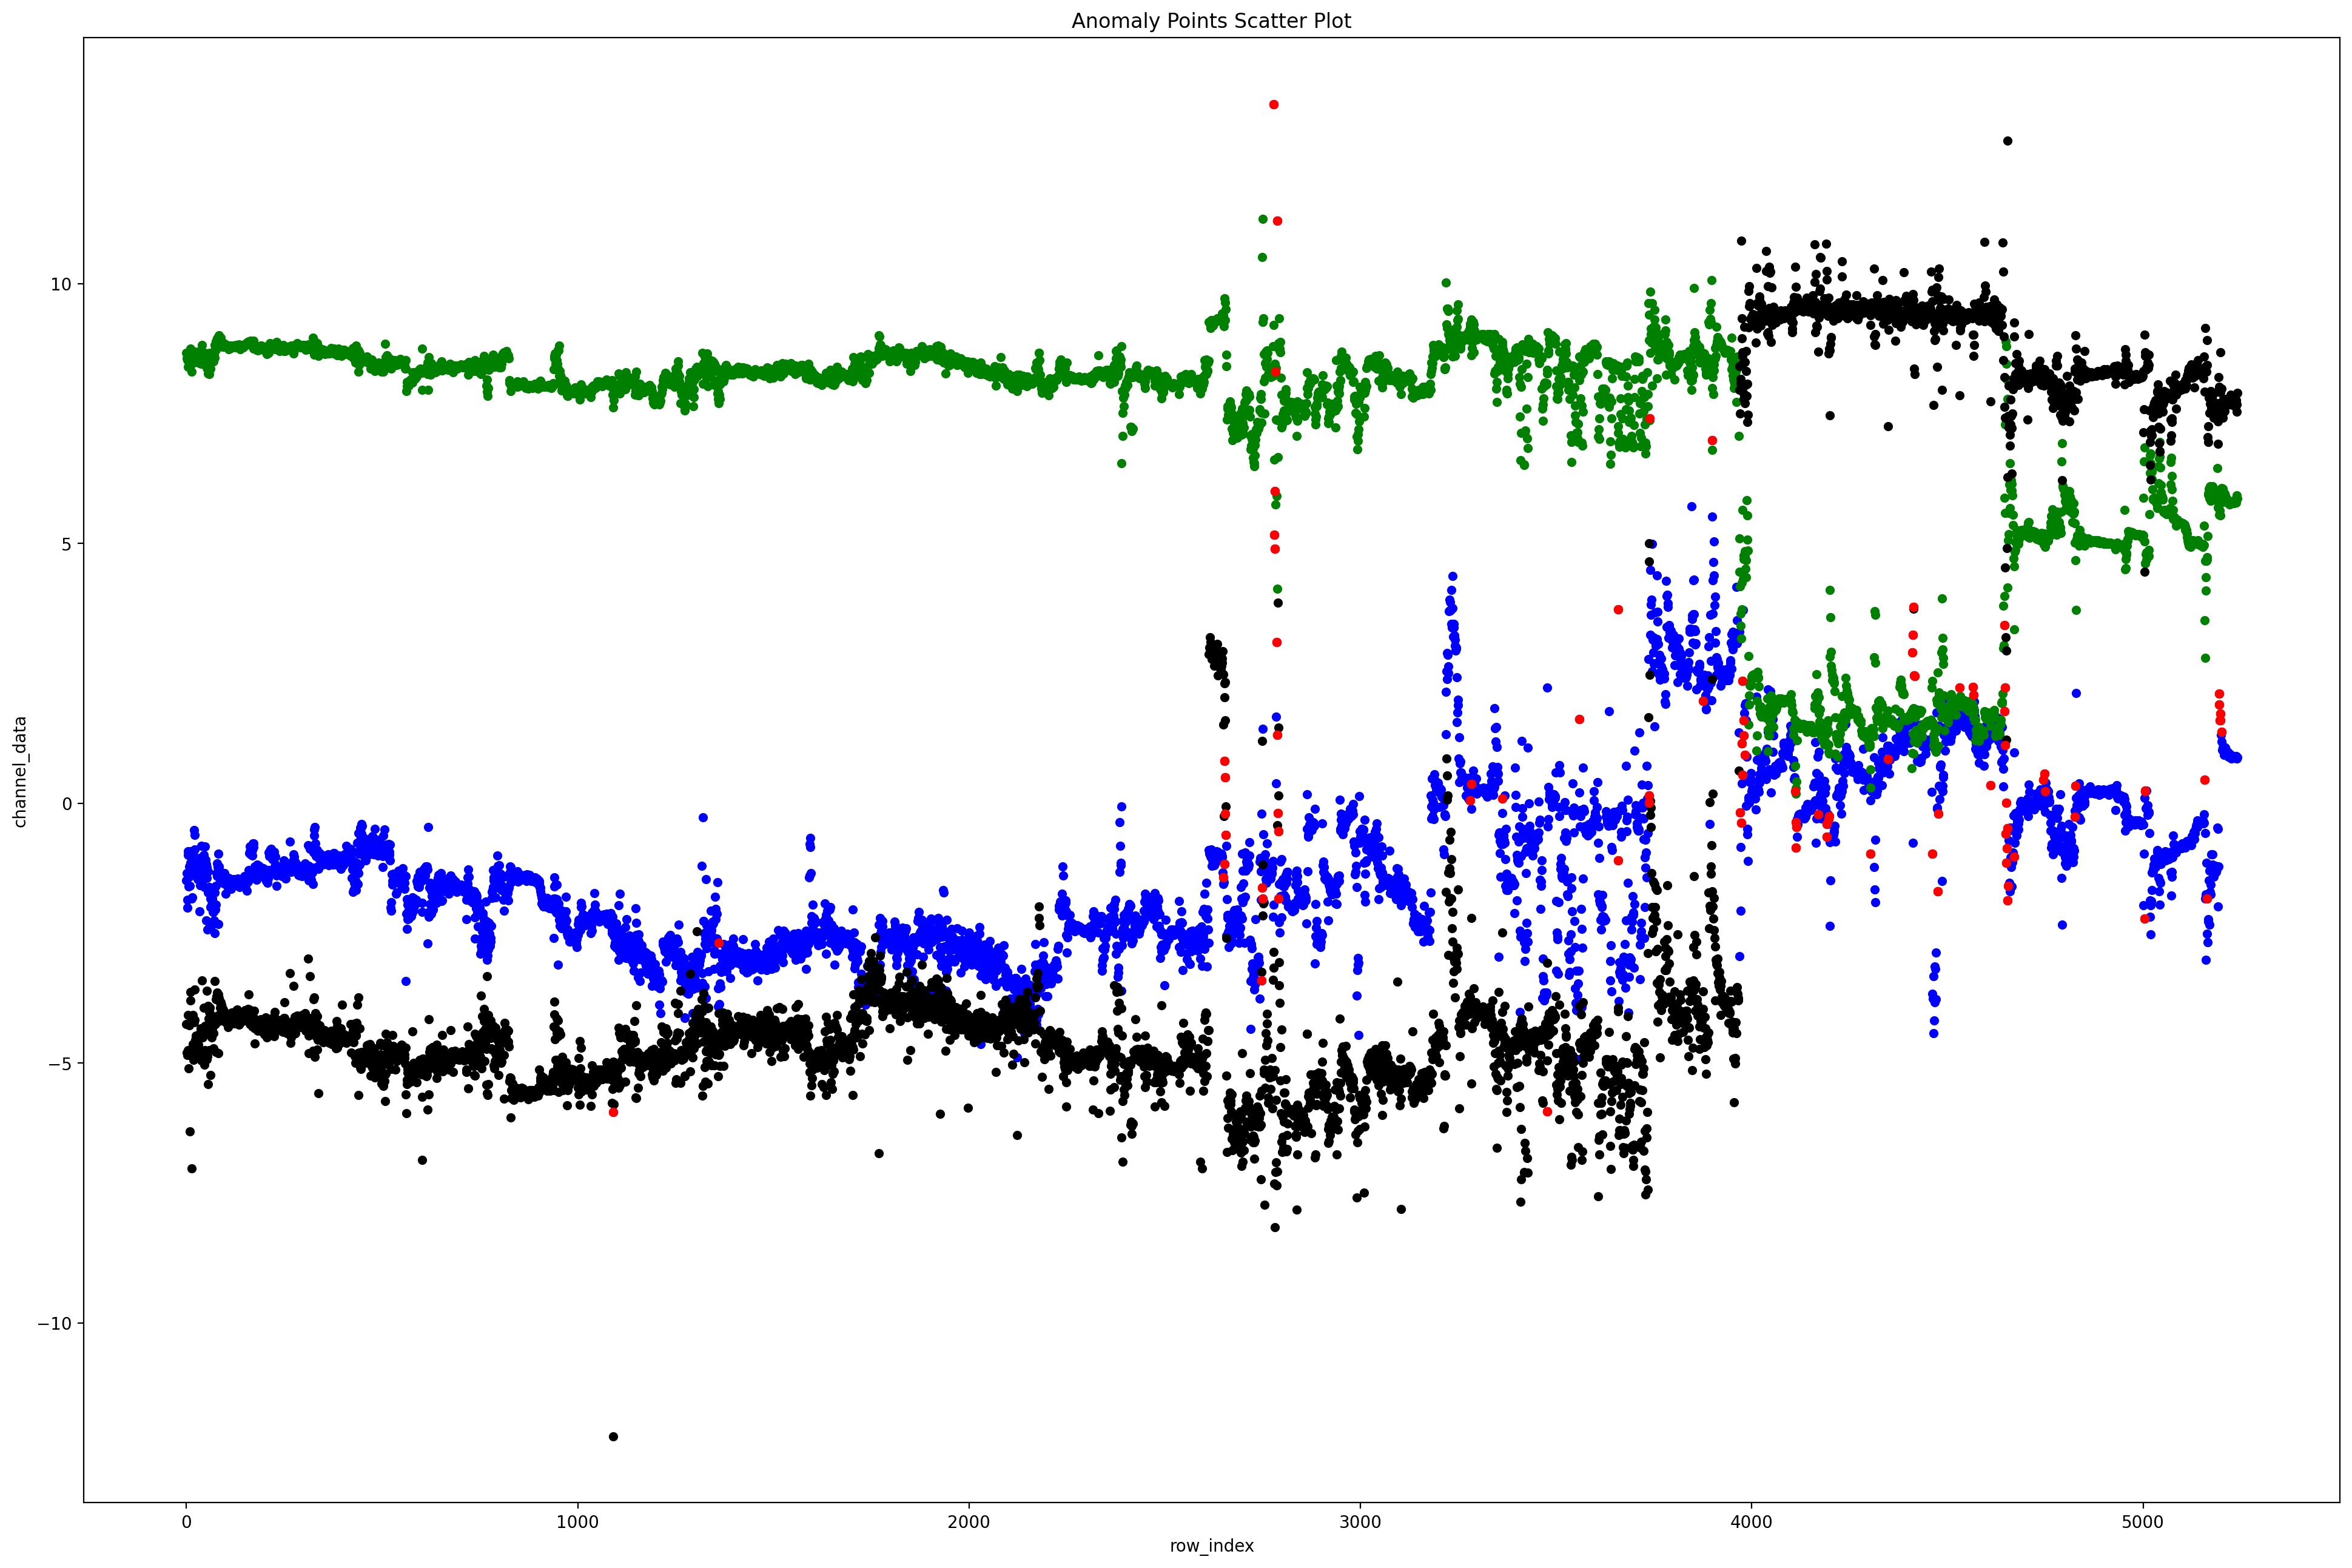

In [33]:
index = [range(record['x'].shape[0])]
plt.scatter(index, record['x'], color='blue', s=20)
plt.scatter(index, record['y'], color='green', s=20)
plt.scatter(index, record['z'], color='black', s=20)
plt.xlabel('row_index')
plt.ylabel('channel_data')
plt.title('Anomaly Points Scatter Plot')
anomaly_index = testing_APD_DQM.get_anomaly_index()
anomaly_x_value = []
anomaly_y_value = []
anomaly_z_value = []
for i in anomaly_index:
    anomaly_x_value.append(record['x'].iloc[i])
    anomaly_y_value.append(record['x'].iloc[i])
    anomaly_z_value.append(record['x'].iloc[i])
plt.scatter(anomaly_index, anomaly_x_value, color='red', s=20)
plt.scatter(anomaly_index, anomaly_y_value, color='red', s=20)
plt.scatter(anomaly_index, anomaly_z_value, color='red', s=20)
plt.rcParams['figure.figsize'] = [24, 16]
plt.rcParams['figure.dpi'] = 200
plt.show()